# GRIP : THE SPARK FOUNDATION

###Data Science & Business Analytics Intern January 2023 Batch(#GRIPJan2023)


#Name: RESHINA.E.N

##Task 6:Prediction Using Decision Tree Algorithm

Problem statement - Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

import statsmodels.api as sm
from scipy import stats


from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#Display propertice
#pd.set_option('max_columns', 135)
#pd.set_option('max_rows',135)

In [2]:
#load data set
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


Distribution of variables

Number of data according to Species


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

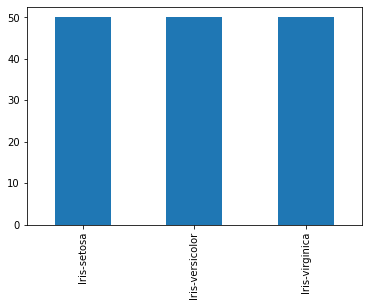

In [6]:
#number of species according to data
print ('Number of data according to Species')
df['Species'].value_counts().plot(kind = 'bar')
df['Species'].value_counts()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
#removing Id column
df.drop('Id',axis=1,inplace=True)

# EDA

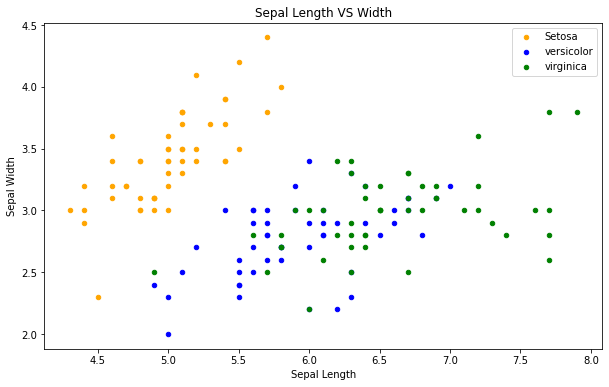

In [9]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width.

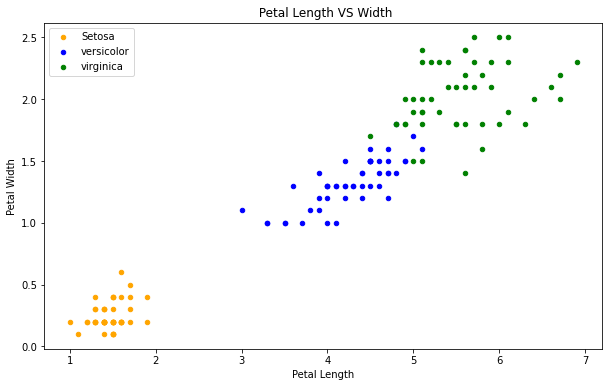

In [10]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows the relationship between the petal length and width.we can see that the Petal features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate predictions over the Sepal. 

Distribution of Length and width.

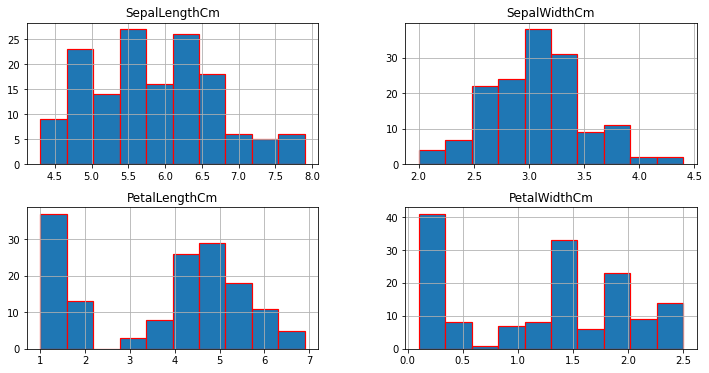

In [11]:
df.hist(edgecolor='red', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

The Length and width according to Species

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

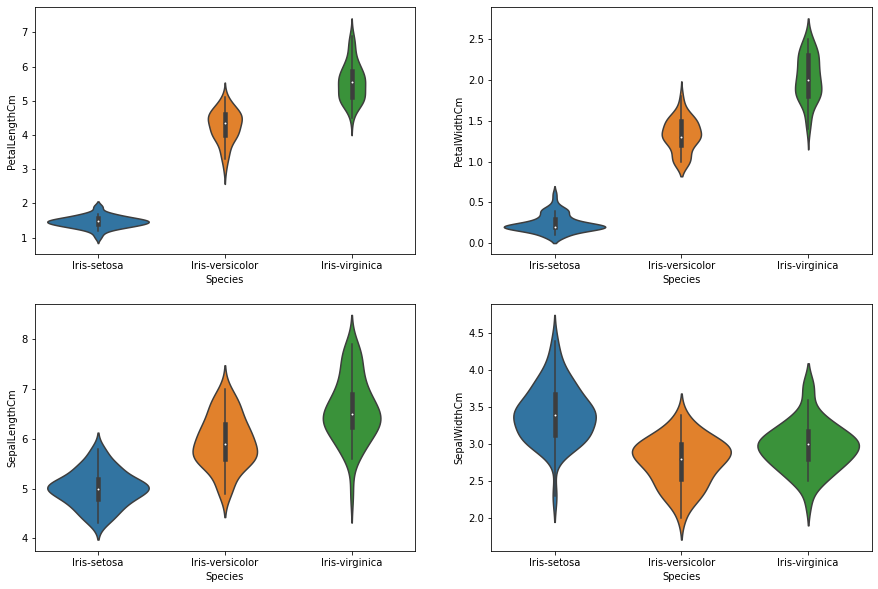

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

The violinplot shows the density of length and width of the species. The thinner parts represent less density whereas the fatter parts represent higher density

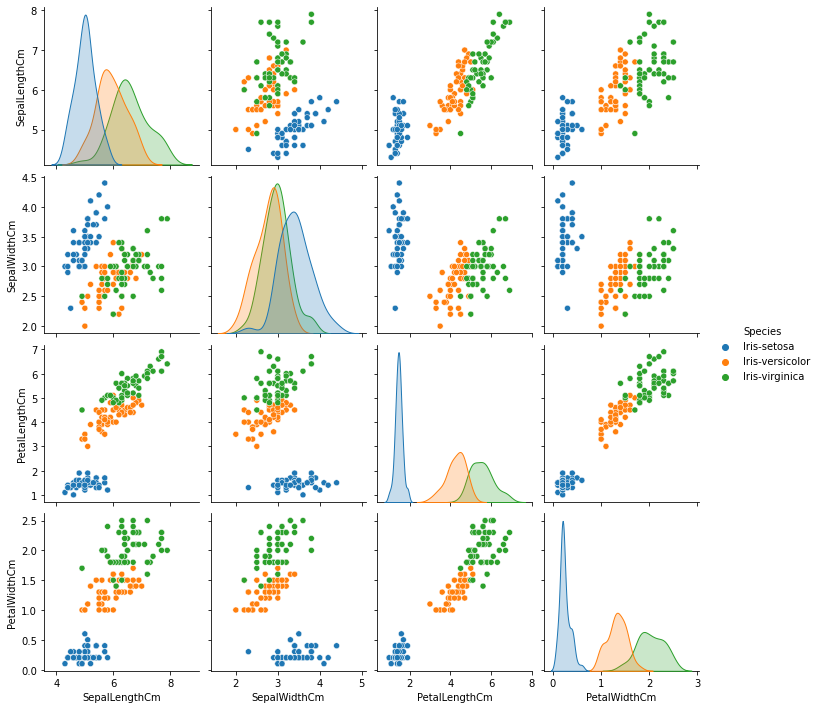

In [13]:
sns.pairplot(df,hue = 'Species')

# Splitting The Data into Training And Testing Dataset

In [14]:
train, test = train_test_split(df, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [15]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

In [16]:
train_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
139,6.9,3.1,5.4,2.1
98,5.1,2.5,3.0,1.1


In [17]:
test_X.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
55,5.7,2.8,4.5,1.3
141,6.9,3.1,5.1,2.3


In [18]:
train_y.head()  ##output of the training data

139     Iris-virginica
98     Iris-versicolor
64     Iris-versicolor
46         Iris-setosa
127     Iris-virginica
Name: Species, dtype: object

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import  accuracy_score

import xgboost as xgb
import lightgbm as  lgb
from xgboost.sklearn import XGBClassifier


from sklearn.preprocessing import StandardScaler, LabelBinarizer
# auxiliary function
from sklearn.preprocessing import LabelEncoder
def random_colors(number_of_colors):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    return color


Logistic Regression

Logistic regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome

In [20]:

lr_model = LogisticRegression()
lr_model.fit(train_X,train_y)
lr_predict = lr_model.predict(test_X)

print('Logistic Regression - ',accuracy_score(lr_predict,test_y))

Logistic Regression -  0.9777777777777777


SVM - Suppot Vector Machine
It is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. 

In [21]:
svm_model = SVC(kernel='linear')
svm_model.fit(train_X,train_y)
svc_predict = svm_model.predict(test_X)

print('SVM - ',accuracy_score(svc_predict,test_y))

SVM -  1.0


Decision Tree 

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [22]:
dt_model = DecisionTreeClassifier(max_leaf_nodes=3)
dt_model.fit(train_X,train_y)
dt_predict = dt_model.predict(test_X)

print('Decision Tree - ',accuracy_score(dt_predict,test_y))

Decision Tree -  0.9555555555555556


Random Forest 

Random Forest is a versatile machine learning method capable of performing both regression and classification tasks. 

In [23]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(train_X,train_y)
rfc_predict = rfc_model.predict(test_X)

print('Random Forest - ',accuracy_score(rfc_predict,test_y))

Random Forest -  0.9777777777777777


Here the SVM shows 100 percen accuracy. The other classifications shows almost same that is above 95 percentage.